# Mount Google Drive

In [6]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Visualise evaluation metrics in the form of box plot

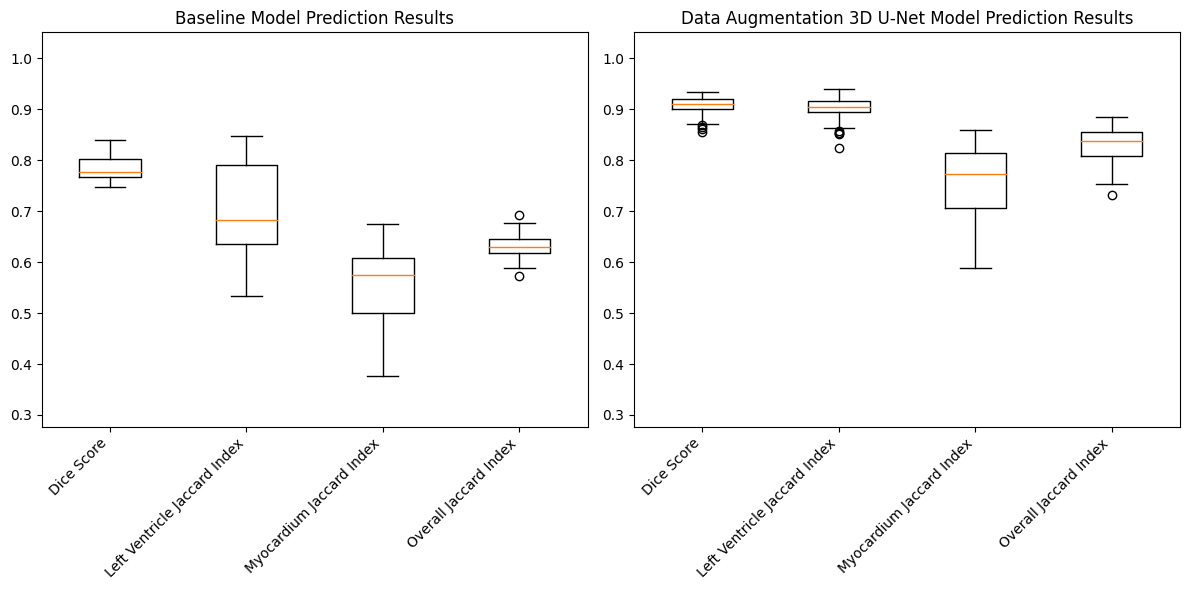

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv('/content/gdrive/My Drive/pred_output/08-13_15-32/eva_metrics_.csv')
sdf_data = pd.read_csv('/content/gdrive/My Drive/pred_output/SDF/09-06_21-34/eva_metrics.csv')
aug_data = pd.read_csv('/content/gdrive/My Drive/pred_output/08-30_13-46/eva_metrics.csv')

# Separate the data for Hausdorff Distance and other columns
hausdorff_data = data['Hausdorff Distance']
other_data = data.drop(columns=['Hausdorff Distance'])

hausdorff_data_sdf = sdf_data['Hausdorff Distance']
other_data_sdf = sdf_data.drop(columns=['Hausdorff Distance'])

hausdorff_data_aug = aug_data['Hausdorff Distance']
other_data_aug = aug_data.drop(columns=['Hausdorff Distance'])

# Create a figure and axes for the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Create a box plot for baseline Hausdorff Distance
# boxplot_hausdorff = ax1.boxplot(hausdorff_data, vert=True)
# ax1.set_xticklabels(['Hausdorff Distance'])
# ax1.set_title('Baseline Model Prediction Results')

# # Create a box plot for sdf Hausdorff Distance
# boxplot_hausdorff_aug = ax2.boxplot(hausdorff_data_aug, vert=True)
# ax2.set_xticklabels(['Hausdorff Distance'])
# ax2.set_title('Data Augmentation 3D U-Net Model Prediction Results')

# Create a combined box plot for other columns for baseline
boxplot_other = ax1.boxplot(other_data.values, vert=True)
ax1.set_title('Baseline Model Prediction Results')
ax1.set_xticklabels(['Dice Score', 'Left Ventricle Jaccard Index', 'Myocardium Jaccard Index', 'Overall Jaccard Index'], rotation=45, ha='right', wrap=False)

# Create a combined box plot for other columns
boxplot_other = ax2.boxplot(other_data_aug.values, vert=True)
ax2.set_title('Data Augmentation 3D U-Net Model Prediction Results')
ax2.set_xticklabels(['Dice Score', 'Left Ventricle Jaccard Index', 'Myocardium Jaccard Index', 'Overall Jaccard Index'], rotation=45, ha='right', wrap=False)

# # Set the same y-axis limits for both subplots
# ax1.set_ylim(min(min(hausdorff_data), min(hausdorff_data_sdf)) - 0.5, max(max(hausdorff_data), max(hausdorff_data_sdf))+0.5)
# ax2.set_ylim(min(min(hausdorff_data), min(hausdorff_data_sdf)) - 0.5, max(max(hausdorff_data), max(hausdorff_data_sdf))+0.5)

# Calculate the common y-axis limits
y_min = min(min(other_data.min()), min(other_data_sdf.min())) - 0.1
y_max = max(max(other_data.max()), max(other_data_sdf.max())) + 0.1

# Set the same y-axis limits for both subplots
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

# Plot loss lines

91
87
